In [1]:
# Importing  all the functions defined in functions.py
from functions import *

In [2]:
# Model setup
# n_iter = 10
t_max = 30 # how many days will the simulation run
n_hh = 10000
type_of_hh_array = [0, 1, 2]
prob_type_of_hh_array = [0.4, 0.3, 0.3]
mean_hh_size_array = [2, 4, 7]
initial_prob_I_array = [0.001, 0.001, 0.001]
mean_n_contacts_within_area = [3, 3, 6]
mean_n_contacts_outside_area = [2, 2, 2]

# transmission parameters
max_recovery_t = 10 # assuming person definitely recovers by these many days
p_max = 0.1 # probability of infecting someone upon contact on most infectious day
mean_gamma = 3.86
sd_gamma = 2.65




In [3]:
# create individuals
# list_hh_ind[0] is list of hh, [1] is list of individuals, [2] has sublists of individuals by type of hh
list_hh_ind = create_hh(n_hh, type_of_hh_array, prob_type_of_hh_array, mean_hh_size_array, initial_prob_I_array)    

In [4]:
# Count how many individuals were created
n_ind = len(list_hh_ind[1])

In [5]:
# Create the initial adjacency list
graph = create_adjacency_list(list_hh_ind, n_hh, n_ind, type_of_hh_array, mean_n_contacts_within_area, mean_n_contacts_outside_area)

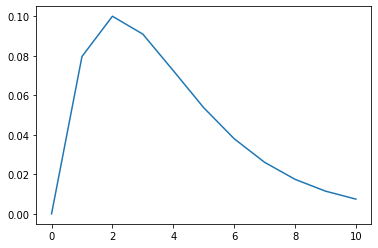

In [20]:
# calculating probability of infecting someone upon contact given the no. of days since infection.
p_t = cal_prob_of_inf(p_max, mean_gamma, sd_gamma, t_inf_max = max_recovery_t)

#define x-axis values
t = np.linspace (0, max_recovery_t, max_recovery_t+1) 

import matplotlib.pyplot as plt
#create plot of Gamma distribution
plt.plot(t, p_t)

In [7]:
# graph.m_adj_list

In [8]:
f = open('test.csv', 'w')
f.write("infector_ID, infector_type_of_hh, infectee_ID, infectee_type_of_hh, time \n")

g = open('sim.csv', 'w')
g.write("S, I, R, t \n")

12

In [9]:
I_temp = len([i for i in list_hh_ind[1] if i.get_state() == "I"])
S_temp = n_ind - I_temp
R_temp = 0

In [10]:
t = 0
while t <= t_max:
    inds = list(graph.m_adj_list.keys()) # list of all individuals in the population
    infs = [ind for ind in inds if ind.get_state() == "I"] # list of all infected individuals in the population
    for inf in infs:
        time_since_infection = t - inf.get_time_of_infection()
        if time_since_infection >= max_recovery_t:
            inf.ItoR()
            I_temp -= 1
            R_temp += 1
        else:
            connections = graph.m_adj_list[inf] # set of all connections for a given infected individual
            sus = [con for con in connections if con[0].get_state() == "S"]
            n_to_infect = int(np.random.binomial(len(sus), p_t[time_since_infection], 1)) # this depends on how long inf individual has been infectious
            sus_selected = random.sample(sus, n_to_infect) # selecting susceptibles who will get infected
            for sus_sel in sus_selected:
                # Do the following actions now that is person is getting infected
                sus_sel[0].add_time_of_infection(t)
                sus_sel[0].add_infector_ID(inf.get_ID())            
                sus_sel[0].add_infector_hh(inf.get_hh())          
                sus_sel[0].add_infector_type_of_hh(inf.get_type_of_hh())           
                sus_sel[0].StoI()           

                # write these datapoints into a file
                infector_ID_temp = str(inf.get_ID())
                infector_type_of_hh_temp = str(inf.get_type_of_hh())            
                infectee_ID_temp = str(sus_sel[0].get_ID())
                infectee_type_of_hh_temp = str(sus_sel[0].get_type_of_hh())            
                time_of_infection_temp = str(t)
                f.write(infector_ID_temp+","+infector_type_of_hh_temp+","+infectee_ID_temp+","+infectee_type_of_hh_temp+","+time_of_infection_temp+"\n")

                # update SIR dataset
                S_temp -= 1
                I_temp += 1
        
    t += 1
    # update SIR dataset
    g.write(str(S_temp)+","+str(I_temp)+","+str(R_temp)+","+str(t)+"\n")
    
f.close()
g.close()
    

In [11]:
# inds = list(graph.m_adj_list.keys()) # list of all individuals in the population
# recs = [ind for ind in inds if ind.get_state() == "R"]
# recs

In [12]:
import pandas as pd

df = pd.read_csv('test.csv')

print(df) 

       infector_ID   infector_type_of_hh   infectee_ID   infectee_type_of_hh  \
0              127                     2          3703                     2   
1              127                     2          7562                     1   
2              127                     2         22124                     1   
3             1628                     1         20705                     1   
4             2117                     2          2115                     2   
...            ...                   ...           ...                   ...   
40895        29426                     0         12229                     0   
40896        36215                     2         15083                     1   
40897        19545                     1         23821                     1   
40898        21776                     0         26583                     1   
40899        24839                     0         39815                     1   

        time   
0           1  
1      

In [13]:
# graph.m_adj_list

In [14]:
a = dict(graph.m_adj_list)
list(a.keys())[0].get_type_of_hh()
H = nx.Graph(a)  # create a Graph dict mapping nodes to nbrs
# list(H.edges)
# list(H.nodes)

import networkx as nx
G = nx.Graph()

for i in range(n_ind):
    G.add_node(list(a.keys())[i].get_ID())

list(G.nodes)


import matplotlib.pyplot as plt


nx.draw(H, with_labels=False)


NameError: name 'nx' is not defined

In [ ]:
ind

In [ ]:
list(graph.m_adj_list[ind])

listable attributes

In [15]:
inds = list(graph.m_adj_list.keys())
infs = [ind for ind in inds if ind.get_state() == "I"]
for inf in infs:
    connections = graph.m_adj_list[inf]
    sus = [con for con in connections if con[0].get_state() == "S"]
    

In [16]:
ind = list(graph.m_adj_list.keys())[0]
inds = [i[0].get_ID() for i in list(graph.m_adj_list[ind])]

In [17]:
inds

[28149,
 22131,
 11733,
 26690,
 31166,
 29831,
 30756,
 39343,
 21404,
 1,
 931,
 10714,
 24319,
 11548,
 22228,
 3916]

In [18]:
# printing output of contacts 
list_ind = []
list_type_of_hh = []
list_hh_size = []
list_n_same_hh = []
list_n_same_area = []
list_n_outside_area = []
list_n_total = []

for i in range(n_ind):
    ind_temp = list(graph.m_adj_list.keys())[i].get_ID()
    list_ind.append(ind_temp)
    
    type_of_hh_temp = list(graph.m_adj_list.keys())[i].get_type_of_hh()
    list_type_of_hh.append(type_of_hh_temp) 
    
    hh_size_temp = int(list(graph.m_adj_list.keys())[i].get_hh_size())
    list_hh_size.append(hh_size_temp)
       
    n_same_hh_temp = len(list(filter(lambda x: x[1] == "same_hh", graph.m_adj_list[list(graph.m_adj_list.keys())[i]])))
    list_n_same_hh.append(n_same_hh_temp)
    
    n_same_area_temp = len(list(filter(lambda x: x[1] == "same_area", graph.m_adj_list[list(graph.m_adj_list.keys())[i]])))
    list_n_same_area.append(n_same_area_temp)
    
    n_outside_area_temp = len(list(filter(lambda x: x[1] == "outside_area", graph.m_adj_list[list(graph.m_adj_list.keys())[i]])))
    list_n_outside_area.append(n_outside_area_temp)
    
    n_total_temp = len(graph.m_adj_list[list(graph.m_adj_list.keys())[i]])
    list_n_total.append(n_total_temp)

    
contact_list = [list_ind, list_type_of_hh, list_hh_size, list_n_same_hh, list_n_same_area, list_n_outside_area, list_n_total]


# Convert output to a dataframe
import pandas as pd

contact_list_df = []
contact_list_df = pd.DataFrame(contact_list).transpose()
contact_list_df.rename(columns={0:"ID", 1: "type_of_hh", 2:"hh_size", 3:"contacts_within_hh", 4:"contacts_within_area", 5:"contacts_outside_area", 6: "contacts_total"}, inplace = True)

contact_list_df



,ID,type_of_hh,hh_size,contacts_within_hh,contacts_within_area,contacts_outside_area,contacts_total
0,0,0,2,1,7,8,16
1,1,0,2,1,6,15,22
2,2,0,2,1,6,7,14
3,3,0,2,1,2,6,9
4,4,0,4,3,6,11,20
...,...,...,...,...,...,...,...
40947,40947,0,2,1,6,13,20
40948,40948,0,2,1,6,7,14
40949,40949,1,2,1,8,6,15
40950,40950,1,2,1,2,4,7


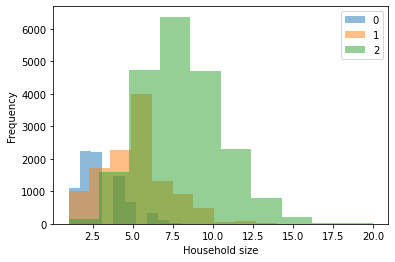

In [19]:
from matplotlib import pyplot as plt

groups = contact_list_df.groupby("type_of_hh")
for name, group in groups:
    plt.hist(group["hh_size"], label=name, alpha = 0.5)
    plt.xlabel('Household size')
    plt.ylabel('Frequency')
plt.legend()